In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import ariel_load
import ariel_model
import ariel_simple
import ariel_simple2
import copy
import tqdm
kgs.sanity_checks_active = True
kgs.sanity_checks_without_errors = True
kgs.n_workers = 5
kgs.profiling = False

local


In [2]:
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

train_data = train_data

In [3]:
model = ariel_model.baseline_model()
model.model.run_in_parallel = True
#model.model.run_in_parallel = True
model.model.starter_model=ariel_simple2.SimpleModelChainer()
model.model.starter_model.model.order_list = [1,2,3]
model.model.starter_model.model.do_regularization = True
def modify_func(model, cc):
        model.m['signal'].m['main'].m['transit'].cov_override = cc[0]
        model.m['signal'].m['main'].m['transit'].mu_override = cc[1]
        # cur_params = model.m['signal'].m['main'].m['transit'].get_parameters()
        # cur_params[-model.m['signal'].m['main'].m['transit'].number_of_extra_parameters:,0] = cc[1]
        # model.m['signal'].m['main'].m['transit'].set_parameters(cur_params)
        return model
model.model.model_options.modify_func = modify_func
model.model.model_options.modify_func_input = kgs.dill_load(kgs.calibration_dir + 'transit_model_tuning9.pickle')    
model = ariel_model.Fudger3(model=model.model)
model.fudge_based_on_AIRS_var = True
model.do_adjust_based_on_u = True
model = model.model
#model.model_options.use_training_labels = True
model.train(train_data)

In [4]:
kgs.debugging_mode = 1
model.infer(train_data);
# for d in tqdm.tqdm(train_data+test_data):
#     dd = copy.deepcopy(d)
#     for t in dd.transits:
#         t.load_to_step(5,dd,loaders)
    #kgs.print_sanity_checks()
# model = ariel_model.baseline_model()
# data = train_data
# model.train(data)
# inferred_data = model.infer(data)
# kgs.score_metric(inferred_data, data)

Processing in parallel: 100%|███████████████████████████████████████████████████████| 1099/1099 [34:02<00:00,  1.86s/it]


local
SpawnPoolWorker-4 4
CUDA_VISIBLE_DEVICES= 0
New solver/alternative transit parameters fallback for planet id 166602615
New solver/alternative transit parameters fallback for planet id 1293223638
New solver/alternative transit parameters fallback for planet id 1311109479
New solver/alternative transit parameters fallback for planet id 1728792101
New solver/alternative transit parameters fallback for planet id 2083890050
New solver/alternative transit parameters fallback for planet id 2179829794
New solver/alternative transit parameters fallback for planet id 3188116178
New solver/alternative transit parameters fallback for planet id 3378847201
New solver/alternative transit parameters fallback for planet id 3469305332
New solver/alternative transit parameters fallback for planet id 4232767776
local
SpawnPoolWorker-5 5
CUDA_VISIBLE_DEVICES= 0
New solver/alternative transit parameters fallback for planet id 128610134
New solver/alternative transit parameters fallback for planet id 2

/mnt/d/ariel2/code/core/kaggle_support.py:331: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


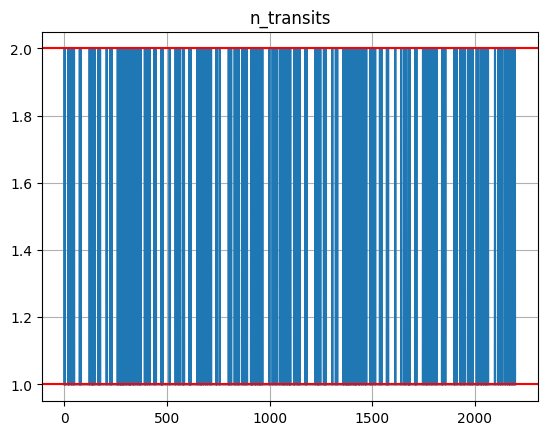

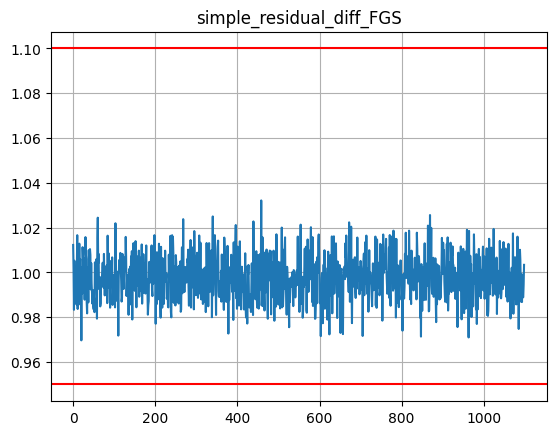

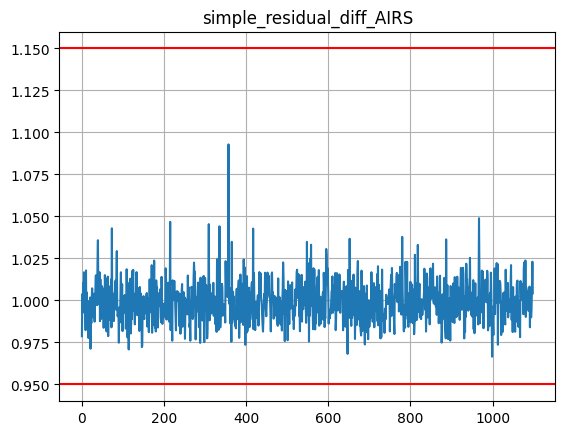

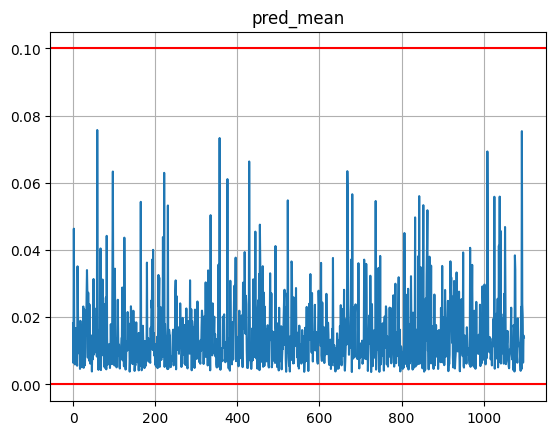

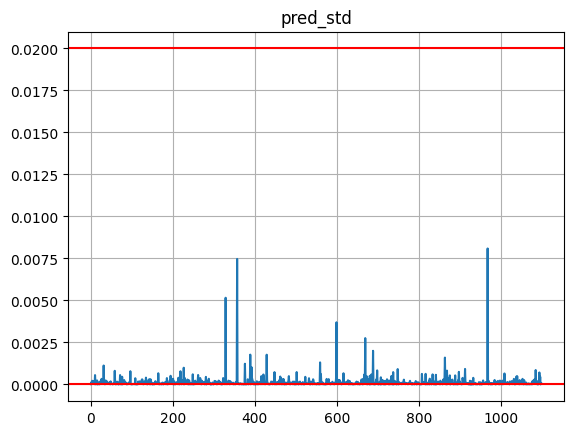

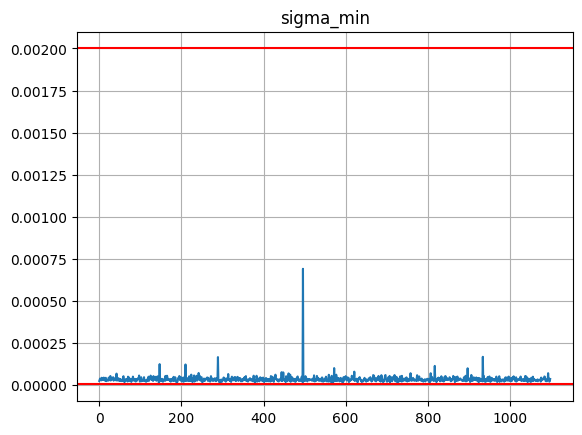

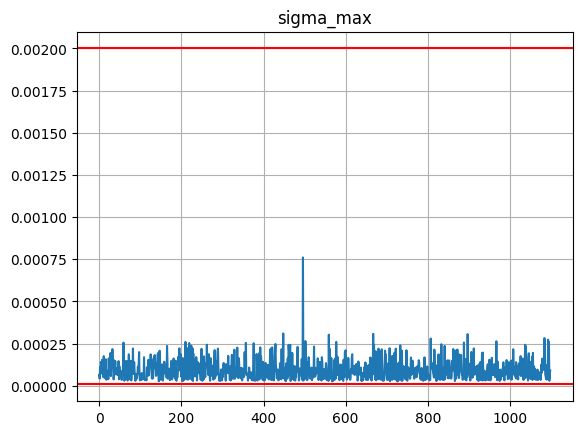

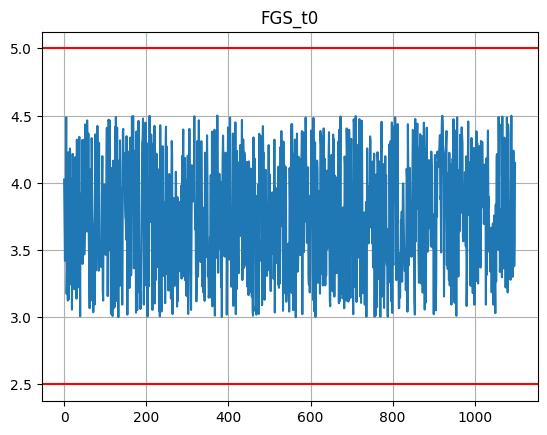

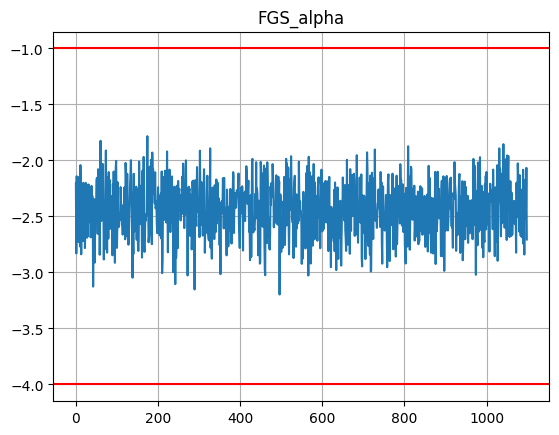

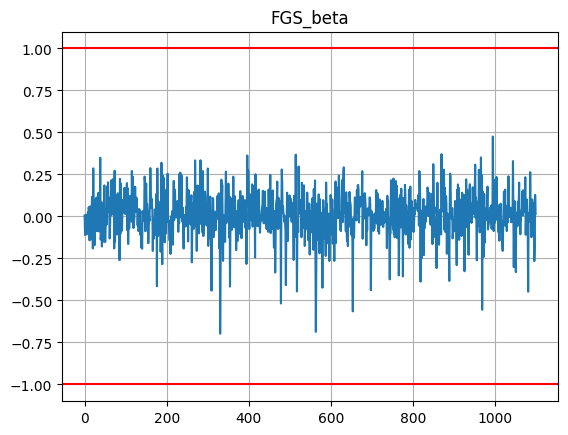

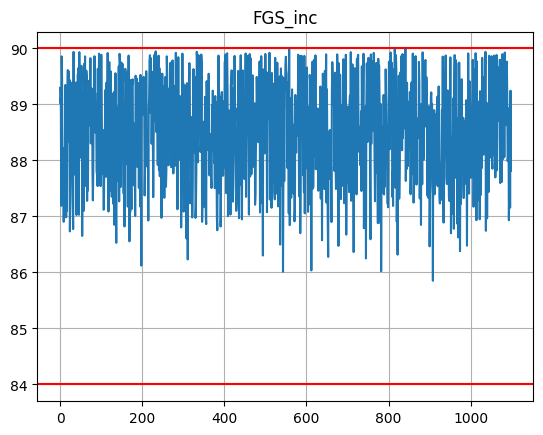

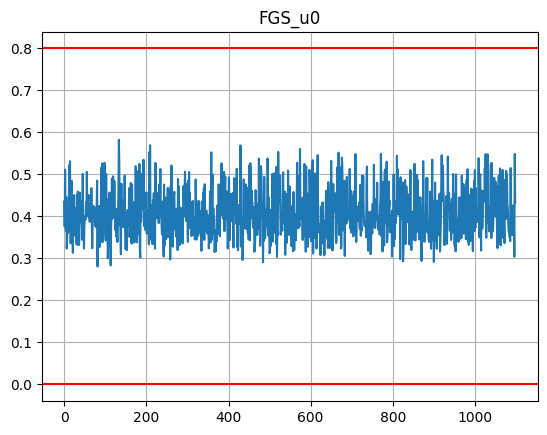

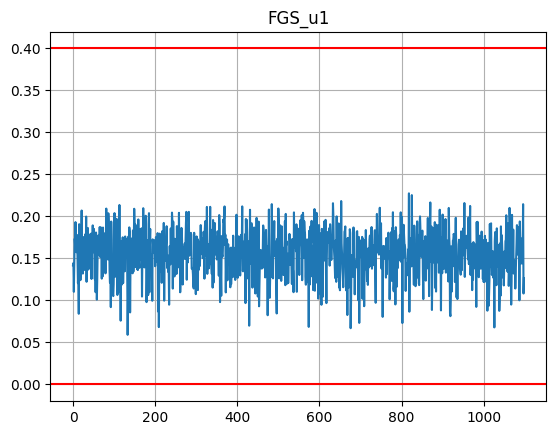

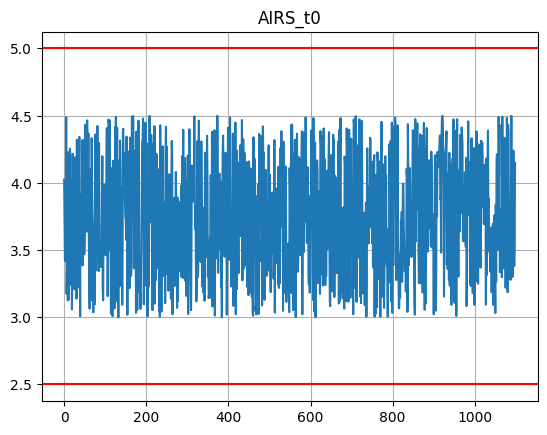

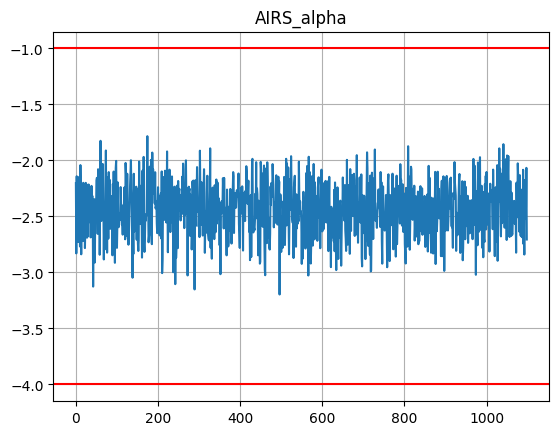

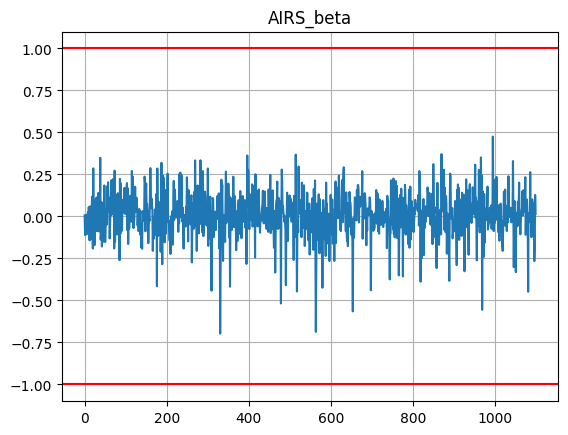

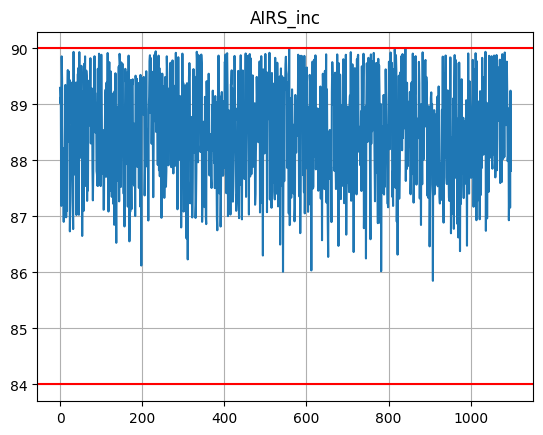

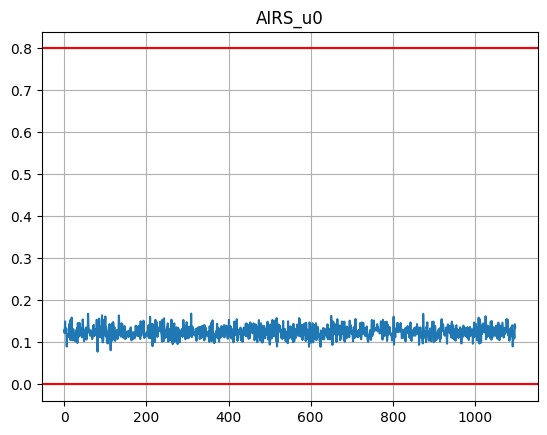

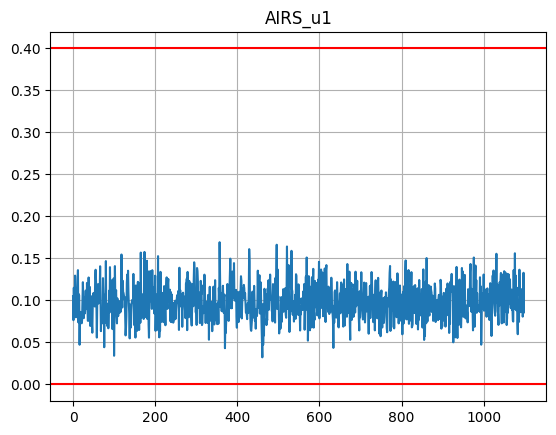

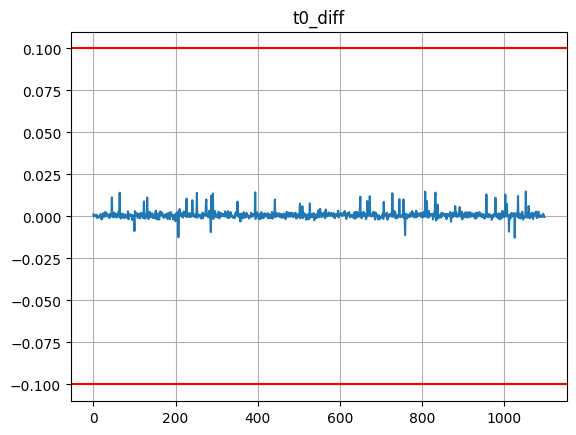

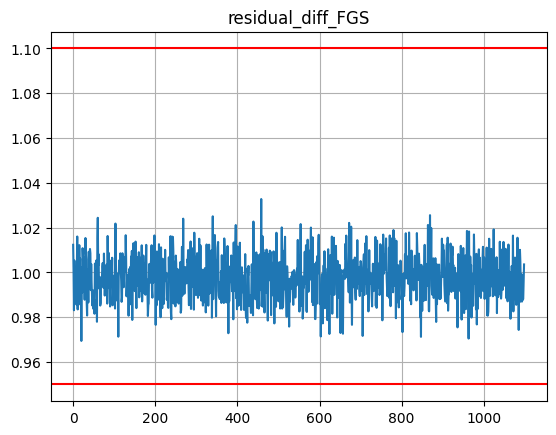

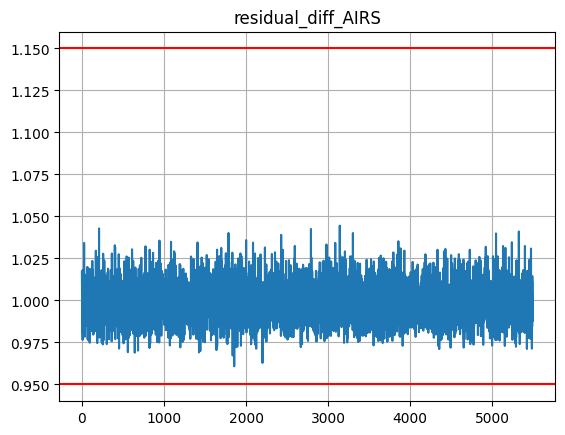

In [5]:
kgs.plot_sanity_checks()

In [6]:
# import subprocess

# # Hibernate Windows
# # subprocess.run(
# #     ["/mnt/c/Windows/System32/shutdown.exe", "/a"],  # add "/f" to force-close apps
# #     check=True
# # )
# subprocess.run(
#     ["/mnt/c/Windows/System32/shutdown.exe", "/h"],  # add "/f" to force-close apps
#     check=True
# )

In [7]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [8]:
inds=np.argsort(kgs.sanity_checks['simple_residual_diff_AIRS'].seen_all[:1099])
inds[-1], kgs.sanity_checks['simple_residual_diff_AIRS'].seen_all[inds[-1]]

#print(repr(inds[-50].tolist()))

(357, 1.0929018407893394)

In [9]:
#train_data = kgs.load_all_train_data()[:980]

In [10]:
# (old inds)
# -1, -2: bad new, good old
# -3, -5, -6: right side issue
# -8: left side issue
# -4: transit start issue
# -7: no visible defect
importlib.reload(ariel_simple)
importlib.reload(ariel_load)
kgs.debugging_mode = 2
# model=ariel_simple.SimpleModel()
# model.unlock_t0 = True
# model.train(train_data)
mm = copy.deepcopy(model)
mm = model.model

#155501234
#ind = np.argwhere(np.array([d.planet_id for d in train_data])==237793157)[0][0]
ind = inds[-2]
#ind=29
print(kgs.sanity_checks['simple_residual_diff_AIRS'].seen_all[ind])
print(kgs.sanity_checks['simple_residual_diff_FGS'].seen_all[ind])
print(ind)
d = copy.deepcopy(train_data[ind])
mm.new_solver=True
#model.loaders[0].cache_steps = []
mm.do_plots = True
#model.weights = [1,1]
dd=mm.infer([d])
# #print(dd[0].diagnostics['transit_params'])
print(dd[0].diagnostics['simple_residual_diff_AIRS'])
print(dd[0].diagnostics['simple_residual_diff_FGS'])
d = copy.deepcopy(train_data[ind])
#mm.new_solver=False
# model.loaders[0].apply_pixel_corrections.remove_last_frame = True
# model.loaders[1].apply_pixel_corrections.remove_last_frame = True
# for ii in range(2):
#     model.loaders[ii].apply_pixel_corrections.new_cosmic_ray_removal = True
#     model.loaders[ii].apply_time_binning.add_last_frame=True
#     model.loaders[ii].apply_pixel_corrections.cosmic_ray_threshold = 10
#     #model.loaders[ii].apply_pixel_corrections.new_cosmic_ray_removal = True
#     #model.loaders[1].apply_pixel_corrections.cosmic_ray_threshold = 10
# #model.loaders[1].apply_pixel_corrections.new_cosmic_ray_removal = False  
# model.loaders[0].cache_steps = []
# model.weights = [1,1]
#d.transit_params = train_data[0].transit_params
d.load_to_step(5, model.loaders)
NN=150
d.transits[0].data[1].data = d.transits[0].data[1].data[:-NN,...]
d.transits[0].data[1].times = d.transits[0].data[1].times[:-NN,...]
d.transits[0].data[1].time_intervals = d.transits[0].data[1].time_intervals[:-NN,...]
# d.transits[0].data[1].data = d.transits[0].data[1].data[NN:,...]
# d.transits[0].data[1].times = d.transits[0].data[1].times[NN:,...]
# d.transits[0].data[1].time_intervals = d.transits[0].data[1].time_intervals[NN:,...]
dd=mm.infer([d])
#print(dd[0].diagnostics['transit_params'])
print(dd[0].diagnostics['simple_residual_diff_AIRS'])
print(dd[0].diagnostics['simple_residual_diff_FGS'])
# d = copy.deepcopy(train_data[ind])
# d.transit_params = train_data[1].transit_params
# #model.weights = [1,100]
# dd=model.infer([d])
# model.do_plots = False
# #print(dd[0].diagnostics['transit_params'])
# print(kgs.sanity_checks['simple_residual_diff_AIRS'].seen_all[-1])
# print(kgs.sanity_checks['simple_residual_diff_FGS'].seen_all[-1])
# #model.weights = [100,1]
# #dd=model.infer([d])
# #print(dd[0].diagnostics['transit_params'])
# model.do_plots=False
# print(kgs.sanity_checks['simple_residual_diff_AIRS'].seen_all[-1])
# print(kgs.sanity_checks['simple_residual_diff_FGS'].seen_all[-1])
# #

AttributeError: 'PredictionModel' object has no attribute 'model'

In [ ]:
%debug

In [ ]:
import ariel_load
import ariel_load_FGS
importlib.reload(ariel_load)
importlib.reload(ariel_load_FGS)
loaders = ariel_load.default_loaders()
loaders[0].cache_steps = []
#d.transits = d.transits[1:]
#d.transits[0].observation_number = 1
ariel_load.raw_data_diagnostics(copy.deepcopy(d), 0, loaders)

In [ ]:
%debug

In [ ]:
d.diagnostics['